#K-means números aleatorios

##Importar bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#guardar los graficos en el cuaderno de jupyter
%matplotlib inline

##creamos unos arrays con números aleatorios

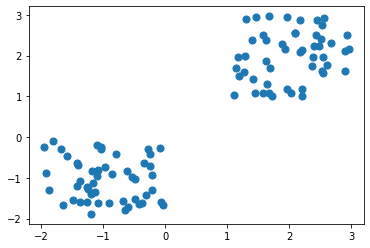

In [ ]:
#array de 100x2
X= -2 * np.random.rand(100,2)
#cambiamos datos de la columna 0 entre el 50 al 100 con datos lejanos
X[50:100, :] = 1 + (2 * np.random.rand(50,2))
#generamos dos grupos (columna1 y columna2)
plt.scatter(X[ : , 0], X[ :, 1], s = 50)
plt.show()

##Creamos la instancia del algoritmo

In [ ]:
#como sabemos de entrada que son dos grupos entonces seran dos centroides
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

##buscamos los centroides

In [ ]:
Centros = Kmean.cluster_centers_

##dibujamos los centroides para cada clouster

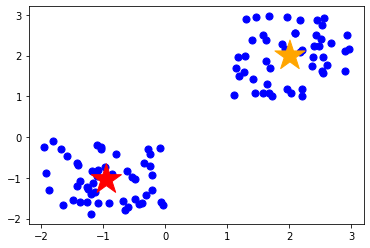

In [ ]:
colores=['orange','red']
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(Centros[:, 0], Centros[:, 1], marker='*', c=colores, s=1000)
plt.show()

##probando el algoritmo


In [ ]:
#forma como se crearon los cluster (0 y 1)
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

##Probando con datos manuales

In [ ]:
#https://www.w3resource.com/numpy/manipulation/reshape.php
data_test=np.array([-3.0,-3.0]).reshape(1, -1)
Kmean.predict(data_test)

array([1], dtype=int32)

#k-means prestamos bancarios

##importando librerias

In [ ]:
import pandas as pd
import numpy as np
import random as rd

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

##importando dataset

In [ ]:
df_bank = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/mercadeo_bancario.csv")
df_bank.head()

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1


##conociendo los datos

In [ ]:
df_bank.describe()
df_bank.isnull().sum()

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

tomaremos sólo dos variables de los datos – "LoanAmount"/monto del prestamos y "ApplicantIncome"/ingresos del cliente 

In [ ]:
X = df_bank[["LoanAmount","ApplicantIncome"]]
#Visualizamos los datos
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('Ingresos de cliente')
plt.ylabel('monto del prestamo (en miles)')
plt.show()

KeyError: ignored

##buscando los centroides

In [ ]:
#WCSS es la suma de cuadrados de las distancias
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
print(centroids)
print(labels)

##graficando datos y centroides

In [ ]:
colores=['blue','red','green','yellow','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

In [ ]:
print(centroids[:, 0])
# mostramos grupos según Openess y Extraversion 
f1 = df_bank['ApplicantIncome'].values
f2 = df_bank['LoanAmount'].values
 
plt.scatter(f1, f2, c=asignar)
#
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='black', s=100)
plt.show()

##resultados en tablas

In [ ]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_bank.index.values
df_cluster['data_index']= df_bank.Education
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

In [ ]:
df_cluster[df_cluster.cluster == 4]

#k-means psicología (los grandes cinco)
https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

##Importando librerías

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##importando dataset

In [ ]:
df_psico = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/k-means-psicologia.csv")
df_psico.head(5)

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


##conociendo los datos

In [ ]:
df_psico.describe()
#df_psico.isnull().sum()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


###graficando

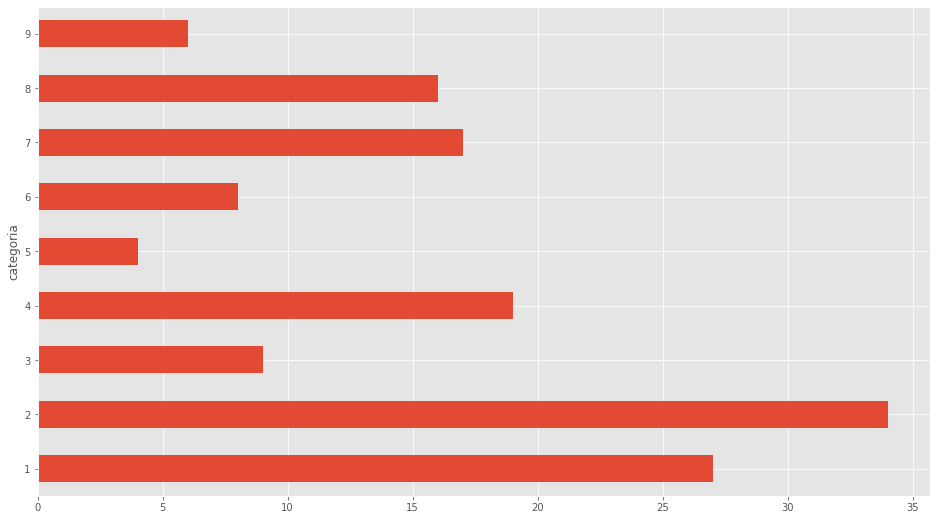

In [ ]:
df_psico.groupby('categoria').size().plot.barh()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


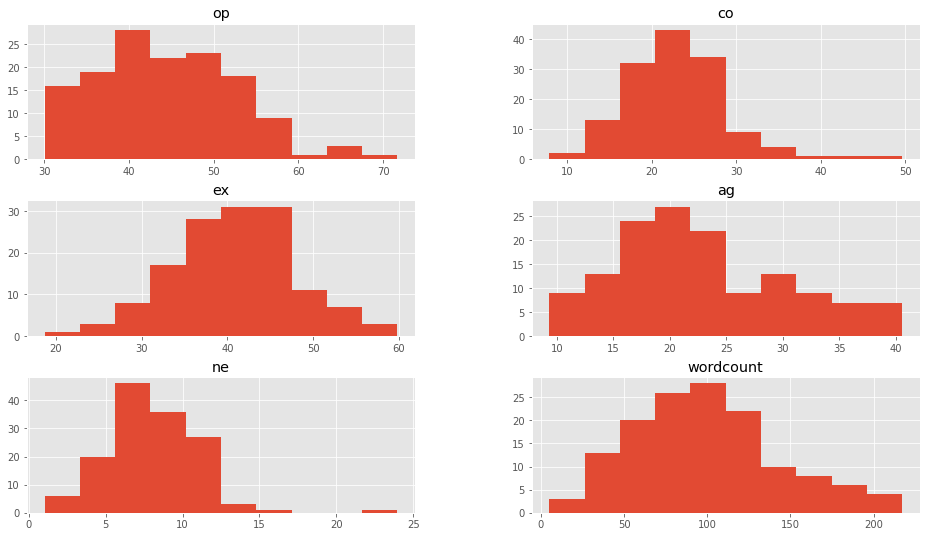

In [ ]:
#Dispersión de los mismos datos
df_psico.drop(['categoria'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


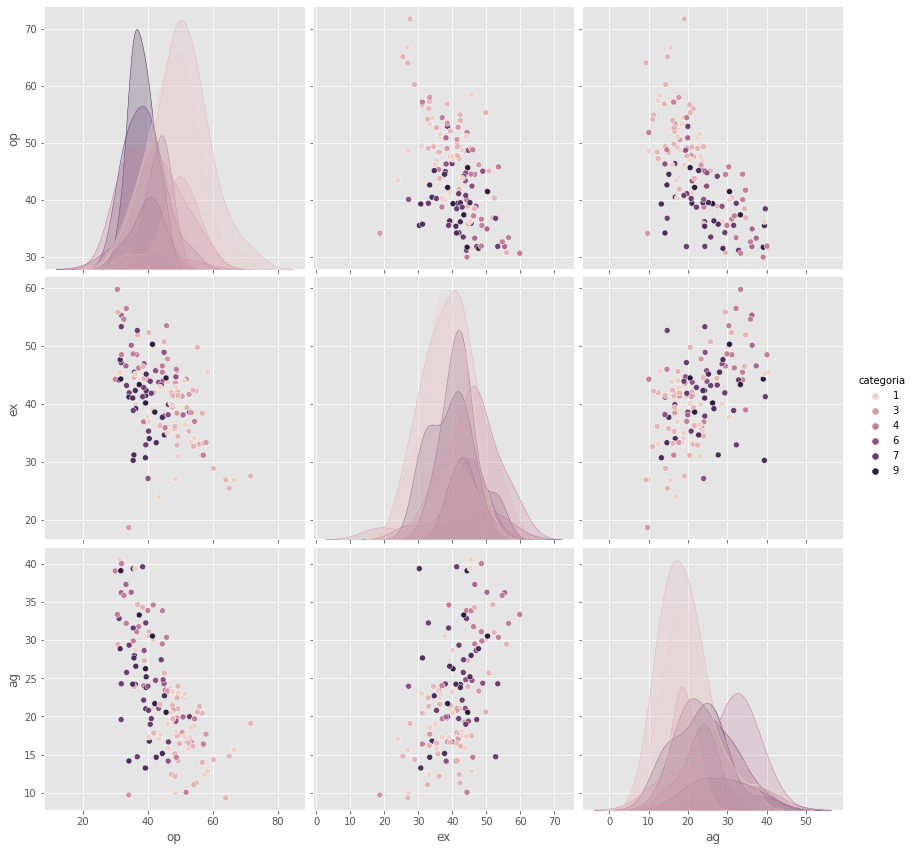

In [ ]:
#graficos de relaciones en pares en el dataset.
#hue= variación de colores dependiendo del valor de la variable
sb.pairplot(df_psico, hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')
#Revisando la gráfica no pareciera que hay algún tipo de agrupación o correlación entre los usuarios y sus categorías. 

##Separamos datos (X y Y)
Aca no trabajaremos con **train** y **test** pues no es un algoritmo de aprendizaje supervisado

In [ ]:
#X = np.array(df_psico[["op","ex","ag"]])
X = np.array(df_psico[["op","co","ex","ag","ne"]])
y = np.array(df_psico['categoria'])
#forma de la matriz
X.shape

(140, 5)

###Graficamos los valores de X en un grafico 3D

['black', 'black', 'cyan', 'green', 'cyan', 'black', 'black', 'yellow', 'black', 'black', 'blue', 'red', 'red', 'green', 'pink', 'blue', 'cyan', 'orange', 'green', 'cyan', 'green', 'blue', 'blue', 'black', 'green', 'cyan', 'pink', 'red', 'cyan', 'blue', 'pink', 'red', 'green', 'black', 'cyan', 'yellow', 'red', 'green', 'green', 'red', 'orange', 'green', 'orange', 'red', 'red', 'green', 'orange', 'blue', 'red', 'black', 'green', 'pink', 'orange', 'green', 'pink', 'green', 'red', 'blue', 'pink', 'green', 'pink', 'cyan', 'green', 'red', 'pink', 'brown', 'red', 'red', 'green', 'cyan', 'orange', 'pink', 'pink', 'cyan', 'brown', 'green', 'pink', 'cyan', 'cyan', 'brown', 'yellow', 'green', 'cyan', 'red', 'green', 'black', 'green', 'blue', 'green', 'red', 'green', 'black', 'green', 'green', 'red', 'black', 'black', 'green', 'cyan', 'orange', 'red', 'red', 'red', 'cyan', 'green', 'cyan', 'green', 'pink', 'black', 'yellow', 'brown', 'brown', 'pink', 'brown', 'black', 'red', 'pink', 'green', 'cya

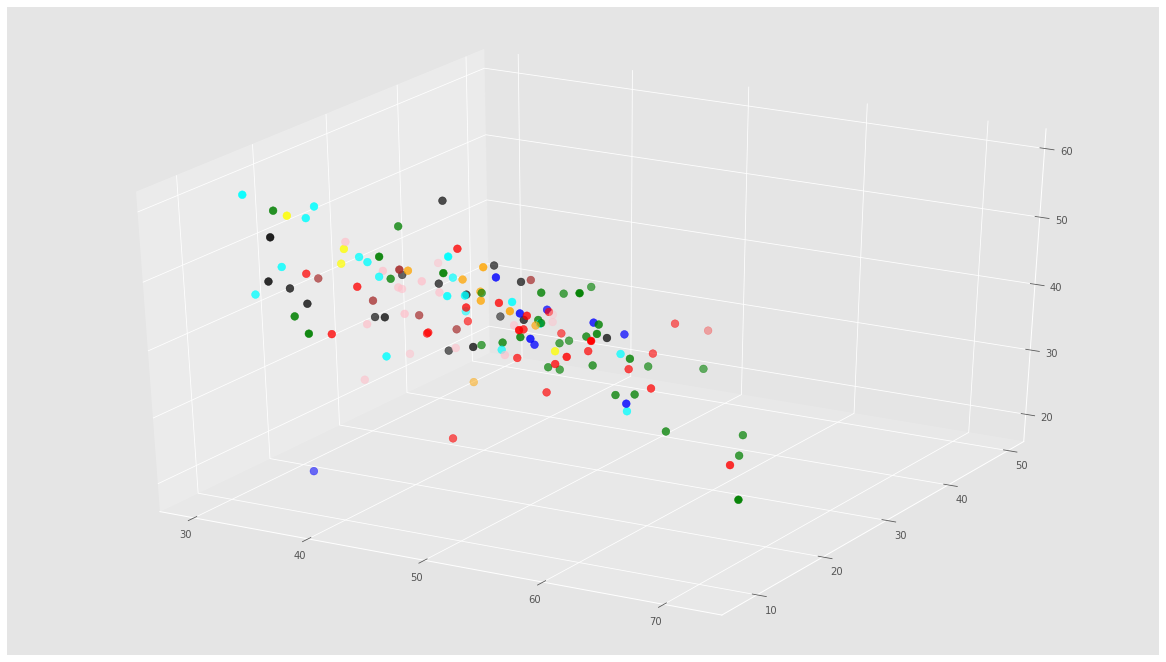

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
#10 categorias / 10 colores
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
print(asignar)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

##encontramos el total de clousters (agrupamientos) idoneo
usaremos el método de codo

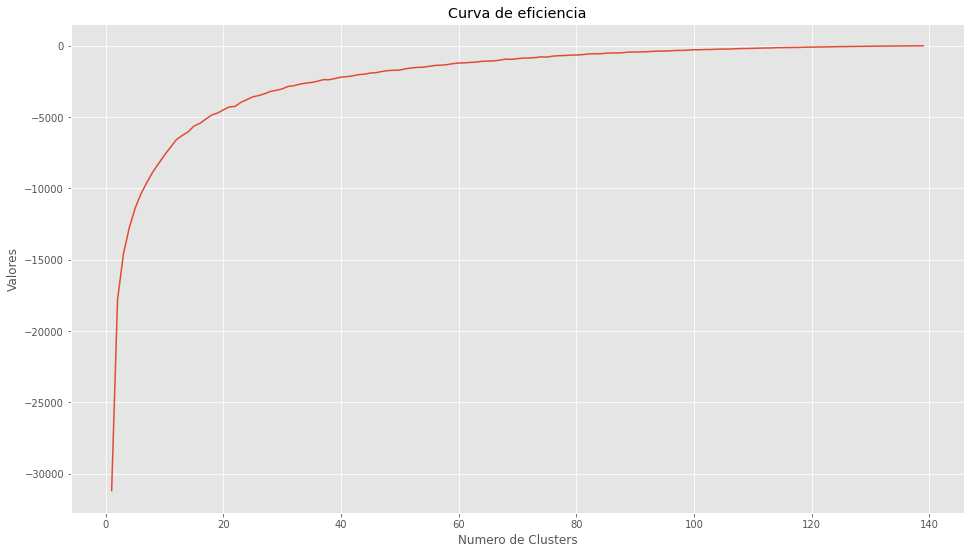

In [ ]:
Nc = range(1, 140)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.show()

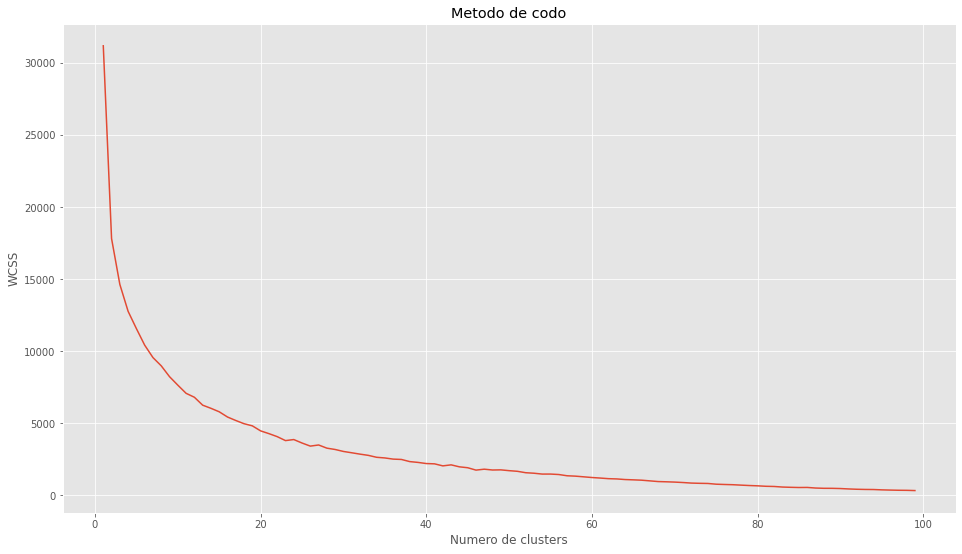

In [ ]:
wcss = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 100), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

##Conocer los centroides

In [ ]:
kmeans = KMeans(n_clusters=20).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[43.78027687 18.73142488 50.02785775 28.13524388  4.93932475]
 [54.1773595  33.608368   33.12453375 16.442867    7.9443275 ]
 [42.4634075  23.1324969  39.9979301  19.7089454  12.3726199 ]
 [33.26774456 18.42006733 45.57173389 38.28703733  8.70785756]
 [53.3724728  24.0584556  39.8865313  16.2743171   5.6200887 ]
 [37.57333436 21.63835664 46.83788064 31.69380945  7.94973191]
 [56.63237662 23.32359975 32.79381863 16.70316563  7.14838813]
 [48.34326333 23.4517634  36.96884807 22.36284467  8.55750887]
 [46.92805733 28.62949478 38.49191    16.092126    8.981827  ]
 [31.89659283 15.92909    55.9515465  31.92967183  5.00179033]
 [39.11913375 35.86451625 35.164616   15.70848875 12.765229  ]
 [39.93910664 26.55340171 43.49570864 23.00775721  7.9987545 ]
 [38.81528    17.4348775  21.3382215  13.3573675   8.9133485 ]
 [66.8561865  21.1855165  26.7036905  14.69732775  3.6431125 ]
 [35.54481767 10.82413667 45.412951   23.62359433  5.66709967]
 [37.55266414 18.74821343 39.76180514 29.172364   10.75

##visualizar grupos y centroides

In [ ]:
#3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 
#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow','cyan','orange','black','pink','brown','purple','silver','dark blue','fuchsia','chestnut','maroon','teal',''] #,'yellow','orange','black','pink','brown']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

IndexError: ignored

In [ ]:
labels = kmeans.predict(X)
labels


##visualización en 2D

In [ ]:
# mostramos grupos según Openess y Extraversion 
f1 = df_psico['op'].values
f2 = df_psico['ex'].values
 
plt.scatter(f1, f2, c=ramdon(20), s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

NameError: ignored

ValueError: ignored

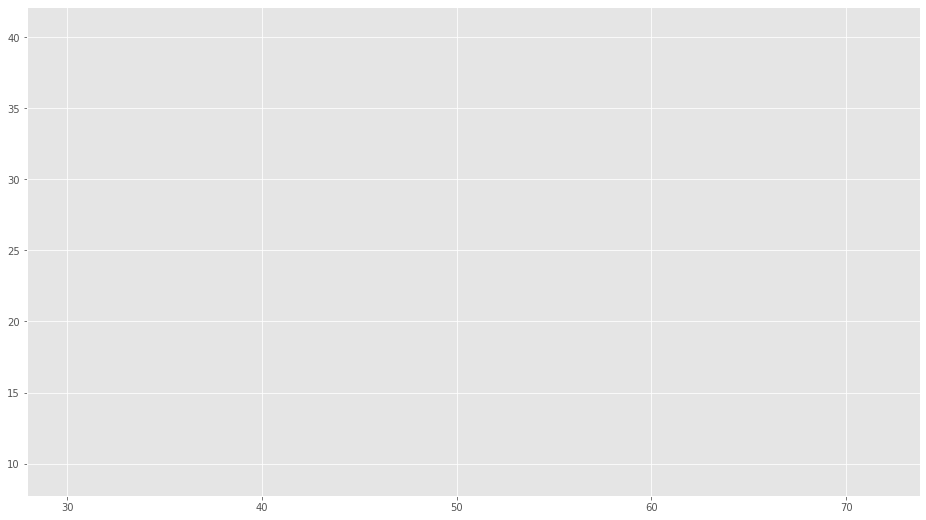

In [ ]:
f1 = df_psico['op'].values
f2 = df_psico['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
f1 = df_psico['ex'].values
f2 = df_psico['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

##Ver resultados en tablas

In [ ]:
copy =  pd.DataFrame()
copy['usuario']=df_psico['usuario'].values
copy['categoria']=df_psico['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

###diversidad por categorias laborales

In [ ]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

##usuarios con rasgos de personalidad más similares

In [ ]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_psico.index.values
df_cluster['data_index']= df_psico.usuario
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

In [ ]:
df_cluster[df_cluster.cluster == 3]

###usuarios más relevantes en cada clouster

In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest
users=df_psico['usuario'].values
for row in closest:
    print(users[row])

##clasificando nuevos datos

In [ ]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

# DATOS DE MERCADO DE VALORES (índice S&P 500)

---


*   El índice Standard & Poor's 500, también conocido como S&P 500, es uno de los índices bursátiles más importantes de Estados Unidos. Al S&P 500 se lo considera el índice más representativo de la situación real del mercado (https://en.wikipedia.org/wiki/List_of_S%26P_500_companies)
*   Lista de empresas que forman parte del índice Dow Jones Industrial Average de https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average



---
Tomaremos los datos publicados en https://www.kaggle.com/camnugent/sandp500

La data (CSV) tiene las siguientes columnas: Fecha - en formato: yy-mm-dd



*   OPEN-Abierto - precio de la acción en el mercado abierto (estos son datos de NYSE, así que todo en USD)
*   HIGH - Alto - Precio más alto alcanzado en el día
*   Low Close - Precio más bajo alcanzado en el día
*   Volumen - Número de acciones negociadas   
*   nombre: el nombre del ticker de la acción

##instalando librerias

In [3]:
# necesitamos la libreria WIKITABLES para descargar tablas de Wikipedia (y mantener actualizada la data)
# Necesitamos la libreria FSSPEC (Interfaces de sistema de archivos para Python)
# Necesitamos la libreria  beautifulsoup4 : para raspado web altamente evolucionadas
#!pip install wikitables
!pip install fsspec
!pip install beautifulsoup4 

     |████████████████████████████████| 134 kB 16.2 MB/s 


##Importando librerías

In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D   #para graficas en 3D

import requests                           # libreria para manejar pedidos internet
from bs4 import BeautifulSoup             # libreria para parsear documentos HTML

#from wikitables import import_tables    # para descargar tablas de Wikipedia
from sklearn.decomposition import PCA   # Análisis de componentes principales (PCA).

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##importando dataset

In [5]:
df_acciones = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/k-means-psicologia.csv")
df_acciones.head(5)

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


## conociendo y Preprocesando los datos



Vamos a usar datos semanales desde 2013 a 2018, donde cada acción tiene su propio rango de valores. Por ejemplo:
 

*   Apple (APPL) empieza en $67.85

*   Adobe (ADBE) en $39.12.

---

La intención de este ejercicio es agrupar las acciones por el comportamiento de sus ganancias, en vez de por su precio de mercado. De esta forma el rendimiento de cada acción es comparable con los demás.


In [6]:
df_acciones.info()
#df_acciones.shape
#df_acciones.describe()
#df_acciones.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


###Eliminando filas vacias
---

eliminamos los datos vacíos (NA) y resetamos el índice

In [7]:
df_acciones = df_acciones.dropna()   # Se eliminan filas que tengan valor NaN.
df_acciones = df_acciones.reset_index(drop=True)

###cambiando el tipo de dato en columnas

In [ ]:
df_acciones['date']=pd.to_datetime(df_acciones['date'])       # Convertimos el campo DATE en tipo fecha
df_acciones = df_acciones.rename(columns={'Name':'symbol'})   #cambiamos el nombre la col de NAME a  SYMBOL
df_acciones.head()

KeyError: ignored

###Descargamos la lista de las 500 compañias S&P 

---

Descargamos la tabla de wikipedia [ https://en.wikipedia.org/wiki/List_of_S%26P_500_companies ] y la guárdamos para su uso posterior

In [12]:
wikiurl="https://en.wikipedia.org/wiki/The_Coca-Cola_Company"   # pagina de wikipedia donde esta la tabla
table_class="wikitable float-left"                   # clase de la tabla
response=requests.get(wikiurl)                                        # hacemos un request(petición)a la pagina
print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')                    # parceamos el texto htmlt
indiatable=soup.find('table',{'style':"text-align: right;"})                   # buscamos el objecto puede ser por la clase o por el ID
df_list_table=pd.read_html(str(indiatable))                                      # LEEMOS el THEAD y TBODY y lo guardamos en una lista
df_companies=pd.DataFrame(df_list_table[0])                                        # convertimos la lista en un dataframe
df_companies.to_csv('companies.csv', index_label='row')
df_companies.head()


200


,Year,Revenuein mil. USD,Net incomein mil. USD,Price per Sharein USD,Employees
0,2000[41],17354,2177,27.71,NaN
1,2001[41],17545,3969,24.35,NaN
2,2002[41],19394,3050,24.88,NaN
3,2003[41],20857,4347,22.04,NaN
4,2004[42],21742,4847,23.22,NaN


###Descargamos la lista de las empresas que cotizan con el índice bursáil DOW JONES DJIA 

---

Descargamos la tabla de wikipedia [https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average] y la guárdamos para su uso posterior

In [11]:
wikiurl="https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"   # pagina de wikipedia donde esta la tabla
table_class="wikitable sortable jquery-tablesorter"                   # clase de la tabla
response=requests.get(wikiurl)                                        # hacemos un request(petición)a la pagina
print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')                    # parceamos el texto htmlt
indiatable=soup.find('table',{'id':"constituents"})                   # buscamos el objecto puede ser por la clase o por el ID
df_list_table=pd.read_html(str(indiatable))                           # LEEMOS el THEAD y TBODY y lo guardamos en una lista
df_DowJones=pd.DataFrame(df_list_table[0])                            # convertimos la lista en un dataframe
df_DowJones.to_csv('DowJones.csv', index_label='row')
df_DowJones.head()

200


,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.02%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.60%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.25%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.96%


In [ ]:
df_DowJones.info()
df_DowJones.describe()

###definidiendo que columnas usaremos para el ejercicio

---
Para este análisis, no solo consideremos la fecha, el precio al cierre y el símbolo.


In [ ]:
df_acciones = df_acciones[['date', 'close', 'symbol']]
df_acciones.head()

In [ ]:
df_acciones.shape

###invertir el dataframe para tener las acciones por fecha y por empresa

colocamos como indice la fecha, como columnas los iniciales de las empresas y como valor el CLOSE de cada celda

In [ ]:
#colocamos como indice la fecha, como columnas los iniciales de las empresas y como valor el CLOSE de cada celda
df_acciones = df_acciones.pivot(index='date', columns='symbol', values='close')
df_acciones = df_acciones.dropna(axis=1)    #borramos filas vacias
df_acciones.head(5)

###Normalización de los datos usando como base la fecha

---
Puede decidir volver a muestrear los datos:

*  W - para datos semanales
*  M - para datos mensuales
*  Q - para el trimestre
*  A - por año

In [ ]:
df_acciones = df_acciones.resample('W').last()
df_acciones.head()

##Graficando datos

---



1.   crear funcion para traer los nombres de la empresa 




In [ ]:
#funcion para sacar el  nombre de las empresas segun  su sigla
def get_name(symbol):
    name = symbol
    try:
        name= df_companies.loc[df_companies['Symbol'] == symbol]['Security'].values[0]
    except:
        name='No tiene nombre el simbolo'
    return name

def plot_stock(symbol, df_acciones=df_acciones):
    name = str(get_name(symbol))
    df_acciones[symbol].plot(title=name, label=name, alpha=0.9);

In [ ]:
get_name('NYSE')

In [ ]:
plot_stock('MSFT')
plot_stock('AAPL')
plt.title(' Valor de Cierre de las acciones')
plt.legend();

###Calcular los rendimientos para que podamos comparar las acciones

---
Calcularemos la devolución desde el primer día de la compra. Por lo tanto, el rendimiento de un día determinado es cuánto se ganaría (o perdería), en porcentaje, si las acciones se vendieran en este día (los costos de transacción no se consideran)


In [ ]:
#df_acciones.head()
start = df_acciones.iloc[0]  #traemos la primera fila y la volvemos un vector
#calculamos el valor del retorno de la acción
returns = (df_acciones - start) / start
returns

In [ ]:
plt.figure(figsize = (20,8))
plot_stock('MSFT', df_acciones=returns)
plot_stock('AAPL', df_acciones=returns)
plt.title('Ganancias de las acciones')
plt.legend();

###¿Cuáles fueron las acciones de mejor y peor desempeño?

### las mejores y las peores 5 empresas con retorno

In [ ]:
best = returns.iloc[-1].sort_values(ascending=False).head() # traemos las acciones mejor ordenadas
worst = returns.iloc[-1].sort_values().head()   #traemos las acciones con el orden inverso (las peores)
print ('--------peores--> ', worst.shape)
print(worst)
print ('--------mejores--> ',best.shape)
print(best)

####Las mejores

In [ ]:
print('____mejor rendimiento de las acciones_____')
names = pd.DataFrame({'name':[get_name(symbol) for symbol in best.index.tolist()]}, index = best.index)
best = pd.concat((best, names), axis=1)
best.head()

In [ ]:
plot_stock('NVDA')
plot_stock('NVDA', df_acciones=returns)
plt.title('Mejores acciones según el valor de cierre VS ganacia en las ventas')
plt.legend();

####las peores

In [ ]:
print('Peores perdidas de acciones')
names = pd.DataFrame({'name':[get_name(symbol) for symbol in worst.index.tolist()]}, index = worst.index)
worst = pd.concat((worst, names), axis=1)
worst

In [ ]:
plot_stock('CHK')
plot_stock('CHK', df_acciones=returns)
plt.title('PEORES acciones según el valor de cierre VS ganacia en las ventas')
plt.legend();

##Conociendo el indice de acciones del DOWN JONES

In [ ]:
#cargamos en una lista las acciones de las empresas que se riguen por el indice del DOWN JONES
down_acciones = [s for s in df_DowJones['Symbol'] if s in df_acciones.columns]  
dow_returns = returns[df_DowJones]   #calculamos las ganancias 
dow_returns.head()

In [ ]:
print(down_acciones)

### calculamos los mejores y los peores del DOWN JONES

In [ ]:
best_dow = dow_returns.iloc[-1].sort_values(ascending=False).head()
worst_dow = dow_returns.iloc[-1].sort_values().head()
print('mejores...', best_dow)
print('peores...', worst_dow)
#-----------------------
print('Las cinco mejores rendimientos de las acciones Dow Jones')
names = pd.DataFrame({'name':[get_name(symbol) for symbol in best_dow.index.tolist()]}, index = best_dow.index)
best_dow = pd.concat((best_dow, names), axis=1)
#best_dow

####Las mejores

In [ ]:
plot_stock('A', df_acciones=returns)
plt.title('Mejor rendimiento de acciones en el Down Jones')
plt.legend();

####Las peores

In [ ]:
print('Las cinco peores rendimientos de las acciones Dow Jones')
names = pd.DataFrame({'name':[get_name(symbol) for symbol in worst_dow.index.tolist()]}, index = worst_dow.index)
worst_dow = pd.concat((worst_dow, names), axis=1)
worst_dow

#DATOS DE MERCADEO DE VALORES (Acciones de Samsung)

---
Vamos a aplicar el algoritmo sobre un conjunto de datos de las acciones de Samsung en bolsa de Estados unidos, donde bucaremos :


*   la señal CLOSE (precio de cierre diario) 
*   la señal VOLUME (número de acciones que han cambiado de manos a lo largo de dicho período de tiempo).


https://es-us.finanzas.yahoo.com/


##Importando librerías

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##importando dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/k_means_samsung_acciones_20100101_20210920.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,16060.0,16180.0,16000.0,16180.0,13076.118164,11950800.0
1,2010-01-05,16520.0,16580.0,16300.0,16440.0,13286.243164,27925850.0
2,2010-01-06,16580.0,16820.0,16520.0,16820.0,13593.347656,22948850.0
3,2010-01-07,16820.0,16820.0,16260.0,16260.0,13140.773438,22107950.0
4,2010-01-08,16400.0,16420.0,16120.0,16420.0,13270.080078,14777550.0


## conociendo y Preprocesando los datos


In [ ]:
#df.describe()
df.isnull().sum()

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

###Normalización de los datos.

---
Como ocurre con cualquier algoritmo de Machine Learning que utilice funciones de distancia, los datos deben ser normalizados antes de aplicarles el algoritmo. En este caso utilizaremos la función MinMaxScaler() que normaliza todos los datos entre [0, 1].


###Eliminando columnas que no necesitaremos (por ahora)

---
extraemos la columna DATE (fecha) que no usaremos en el algoritmo k-means. Antes de extraerla la guardaremos en la variable dates, ya que volveremos a insertarla en nuestro dataframe tras aplicar el algoritmo


In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
# Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = df['Date'] # Guardamos la columna Date.
df = df.drop('Date', 1) # Borramos la columna del dataframe.

###Normalización de los datos.

---
Como ocurre con cualquier algoritmo de Machine Learning que utilice funciones de distancia, los datos deben ser normalizados antes de aplicarles el algoritmo. En este caso utilizaremos la función MinMaxScaler() que normaliza todos los datos entre [0, 1].


In [ ]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

In [ ]:
df_escalado.head()
df_escalado.isnull().sum()

Close     0
Volume    0
2         0
3         0
4         0
5         0
dtype: int64

###Representación gráfica de los datos.

---


*   Ahora podemos echar un vistazo a la representación gráfica de nuestros datos. En el eje x representaremos el precio de cierre (CLOSE) y en el eje y el volumen (VOLUMEN)
*   VAMOS A representar gráficamente los datos normalizados, pero que, si hubiésemos representado los datos sin normalizar la gráfica sería exactamente igual, con la única diferencia que la escala de los ejes sería diferente.





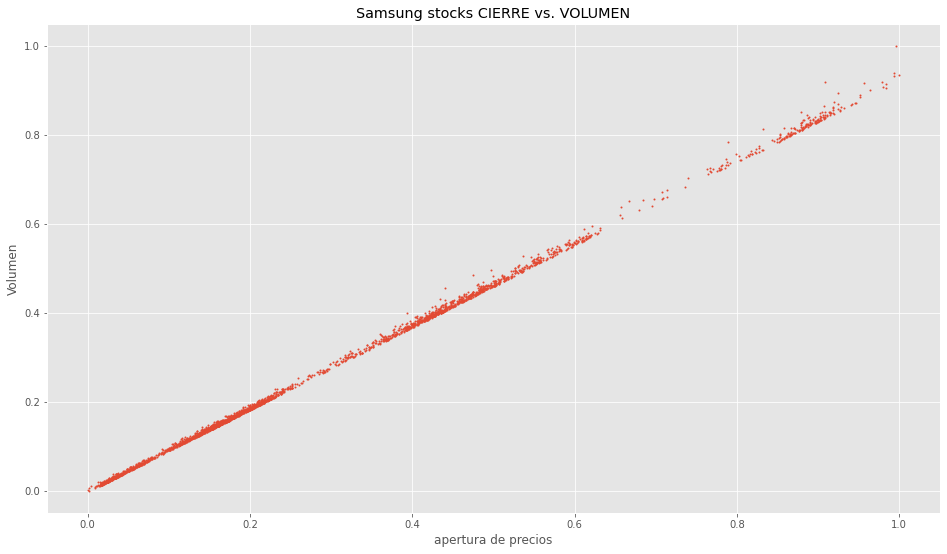

In [ ]:
#%% Representación gráfica de los datos.
x = df_escalado['Close'].values
y = df_escalado['Volume'].values
plt.xlabel('apertura de precios')
plt.ylabel('Volumen')
plt.title('Samsung stocks CIERRE vs. VOLUMEN')
plt.plot(x,y,'o',markersize=1)

##Aplicación de k-means.

---
El primer paso antes de aplicar k-means es decidir qué valor de k (número de clústeres) queremos usar:


1.    Una forma de elegir este valor k es por criterio propio: si conocemos bien la distribución de nuestros datos y queremos “forzar” un número determinado de clústeres simplemente lo elegimos
2.    realizar una gráfica elbow o de codo para determinar el número óptimo de clústeres. Hacemos una iteración de k-means variando el valor de k, de forma que representamos en el eje x dicho valor de k y en el eje y la suma de los errores cuadráticos (SSE). De esta forma podemos elegir el valor de k dónde se produce el “codo”   (**----ESTA ME GUSTA MÁS---**)




###Realizar una gráfica elbow o de codo

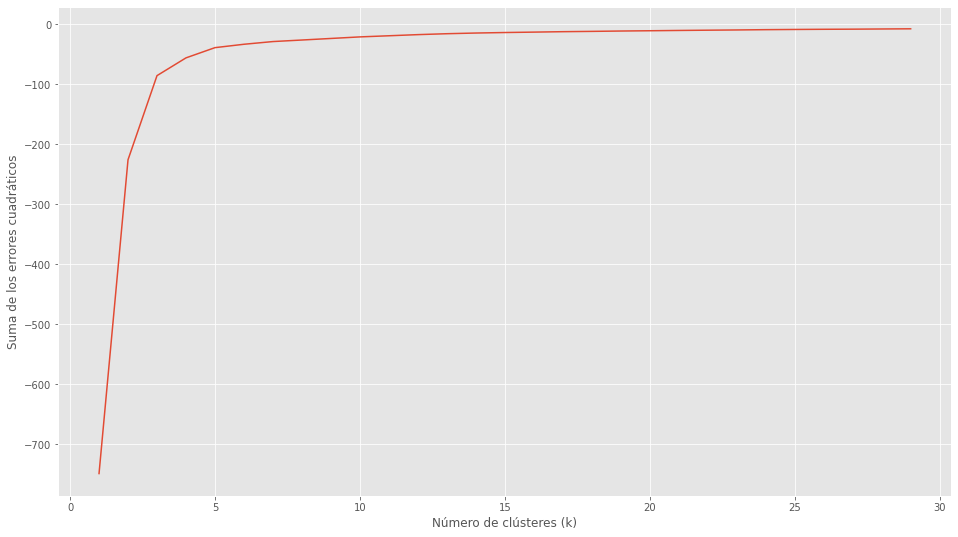

In [ ]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

####NOTA: 

---


**No hay una solución, un valor de k, más correcto que otro**, ya que el objetivo de una clusterización con k-means es obtener información útil nuestros datos, por lo que **nuestra interpretación a posteriori de los clústeres creados marcará la calidad de nuestra solución** escogida

###Aplicar el algoritmo de k-mean

In [ ]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroides

[[0.17549983 0.16223465 0.17647442 0.17477138 0.14736985 0.13999201]
 [0.54100056 0.50404531 0.5399708  0.53594547 0.511793   0.19243124]
 [0.87045494 0.81062534 0.8711934  0.8622432  0.86794266 0.2301659 ]
 [0.05003108 0.04543548 0.05080852 0.05049402 0.04007823 0.2101846 ]
 [0.41162805 0.38290166 0.41204484 0.40876554 0.37828045 0.13383792]]


###Etiquetado de datos.

---
asignamos cada registro de nuestro dataset a uno de los clústers


In [ ]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_escalado)   #generamos las etiquetas de cada clouster
df['label'] = labels                   #añadimos la columna “label” a nuestro dataframe original

df.insert(0, 'Date', dates)           #%% Añadimos la columna de fecha

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,label
0,2010-01-04,16060.0,16180.0,16000.0,16180.0,13076.118164,11950800.0,3
1,2010-01-05,16520.0,16580.0,16300.0,16440.0,13286.243164,27925850.0,3
2,2010-01-06,16580.0,16820.0,16520.0,16820.0,13593.347656,22948850.0,3
3,2010-01-07,16820.0,16820.0,16260.0,16260.0,13140.773438,22107950.0,3
4,2010-01-08,16400.0,16420.0,16120.0,16420.0,13270.080078,14777550.0,3
5,2010-01-11,16420.0,16460.0,15940.0,15940.0,12882.159180,19896100.0,3
6,2010-01-12,15940.0,16180.0,15900.0,16180.0,13076.118164,19218050.0,3
7,2010-01-13,16100.0,16120.0,15940.0,15940.0,12882.159180,13375300.0,3
8,2010-01-14,16120.0,16620.0,16000.0,16540.0,13367.058594,26551550.0,3
9,2010-01-15,16640.0,16860.0,16580.0,16840.0,13609.509766,19905600.0,3


##Representación gráfica de los clústeres k-means.

---
Una vez con los datos etiquetados, podemos visualizar gráficamente en dos dimensiones el clustering realizado por k-means, ya que hemos usado sólo dos variable


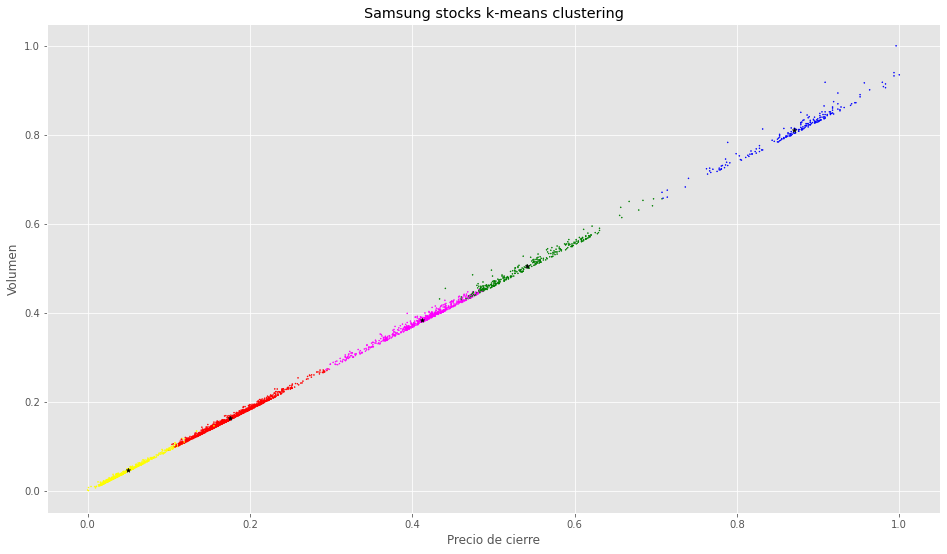

In [ ]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Precio de cierre')
plt.ylabel('Volumen')
plt.title('Samsung stocks k-means clustering')
plt.show()

Que podemos inferir???

##Clasificación de nuevas muestras.

---
Supongamos que nuestros nuevos datos a categorizar son los siguientes:


*   CLOSE: 100.000
*   VOLUME: 5.500.000






### Agregando datos de forma clasica (paso a paso)

In [ ]:
close = 100000
volume = 5500000

nuevo_dato = pd.DataFrame([[close,volume]]) # Nueva muestra
nuevo_dato = nuevo_dato.rename(columns = {0: 'Close', 1: 'Volume'})

#### Normalizamos los nuevos datos

In [ ]:
#agregamos los datos al dataframe original
df_n = df.append(nuevo_dato)

####borramos columnas que no tenemos

---

Nuestro nuevo dataframe df_n tiene aun las columnas “date” y “label” del datafame original, así que las eliminamos y resetamos el índice

In [ ]:
df_n = df_n.drop('Date', 1)
df_n = df_n.drop('label', 1)
df_n = df_n.reset_index(drop=True)

####Aplicamos normalización de datos [0 - 1]

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df_n)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

In [ ]:
df_escalado.iloc[-3:]   #ver los ultimos registros

,Close,Volume,2,3,4,5
425,0.727463,0.635681,0.716102,0.584348,0.717624,0.144704
426,0.706499,0.631925,0.711864,0.603478,0.739656,0.180381
427,NaN,NaN,NaN,1.000000,NaN,0.060904


###Agregando datos usando NUMPY

---

Podemos introducir estos nuevos datos ya normalizados a mano o extraerlos en forma de vector numpy:

In [ ]:
close_n = df_escalado['Close'][2784]
volume_n = df_escalado['Volume'][2784]
import numpy as np
X_new = np.array([[close_n, volume_n]]) # Nueva muestra

KeyError: ignored